In [1]:
from datascience import *
from datascience.predicates import are
import numpy as np
from scipy import stats
from scipy import misc

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

## Literary Characters

Here are a few examples of how we can use computers to explore large amounts of data.

Unless you know some Python already, try not to look too hard at the code at this stage. But do notice how short the code is, and that it uses ordinary words like "read", "split", and "count".

It's also worth keeping in mind that everything to the left of an = sign is a "name" chosen by the person writing the code. Names are usually chosen to describe what they are naming.

### Two American Classics

Thanks to Project Gutenberg, we can read [The Adventures of Huckleberry Finn](http://www.gutenberg.org/cache/epub/76/pg76.txt) and [Little Women](http://www.gutenberg.org/cache/epub/514/pg514.txt) online.

So can Python. It can also split the books into their component chapters.

In [3]:
# Read two books, fast!

huck_finn_url = 'http://www.gutenberg.org/cache/epub/76/pg76.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'http://www.gutenberg.org/cache/epub/514/pg514.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [4]:
# Display the chapters of Huckleberry Finn

Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book  ...
II. WE went tiptoeing along a path amongst the trees bac ...
III. WELL, I got a good going-over in the morning from o ...
IV. WELL, three or four months run along, and it was wel ...
V. I had shut the door to. Then I turned around and ther ...
VI. WELL, pretty soon the old man was up and around agai ...
VII. "GIT up! What you 'bout?" I opened my eyes and look ...
VIII. THE sun was up so high when I waked that I judged  ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...
... (33 rows omitted)

In [5]:
# Count how many times the names Jim, Tom, and Huck appear in each chapter

counts = Table().with_columns([
        'Jim', np.char.count(huck_finn_chapters, 'Jim'),
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck')
    ])

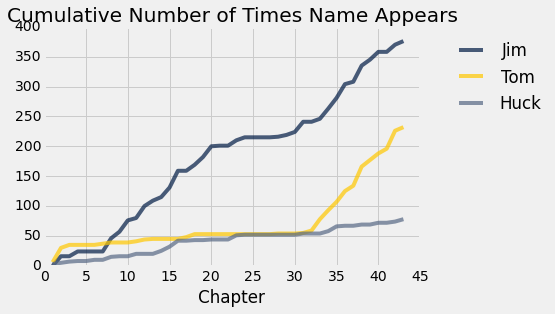

In [6]:
# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Name Appears')

[**Discussion.** What the plot tells us about the story.]

Most of our undergraduates have read Huck Finn. But, based on experience in Data 8, many have not read Little Women. 

In [7]:
# The chapters of Little Women

Table().with_column('Chapters', little_women_chapters)

Chapters
ONE PLAYING PILGRIMS "Christmas won't be Christmas witho ...
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
THREE THE LAURENCE BOY "Jo! Jo! Where are you?" cried Me ...
FOUR BURDENS "Oh, dear, how hard it does seem to take up ...
FIVE BEING NEIGHBORLY "What in the world are you going t ...
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
SEVEN AMY'S VALLEY OF HUMILIATION "That boy is a perfect ...
EIGHT JO MEETS APOLLYON "Girls, where are you going?" as ...
NINE MEG GOES TO VANITY FAIR "I do think it was the most ...
TEN THE P.C. AND P.O. As spring came on, a new set of am ...
... (37 rows omitted)

In [8]:
# Counts of names in the chapters of Little Women

people = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
people_counts = {pp: np.char.count(little_women_chapters, pp) for pp in people}

counts = Table().with_columns([
        'Amy', people_counts['Amy'],
        'Beth', people_counts['Beth'],
        'Jo', people_counts['Jo'],
        'Laurie', people_counts['Laurie'],
        'Meg', people_counts['Meg']
    ])

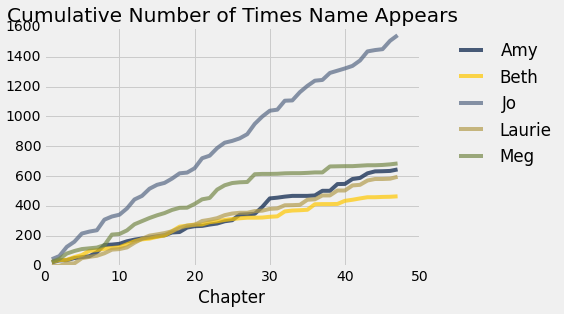

In [9]:
# Plot the cumulative counts

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Name Appears')

[**Discussion.** What the plot tells us about the story.]

### A Different Kind of Character

"Character" can also refer to individual letters (a, b, c, etc) as well as punctuation symbols and spaces.

In [10]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_hf = Table().with_columns([
        'HF Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_lw = Table().with_columns([
        'LW Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

In [11]:
# The counts for Huckleberry Finn

chars_periods_hf

HF Chapter Length | Number of Periods
7026              | 66
11982             | 117
8529              | 72
6799              | 84
8166              | 91
14550             | 125
13218             | 127
22208             | 249
8081              | 71
7036              | 70
... (33 rows omitted)

In [12]:
# The counts for Little Women

chars_periods_lw

LW Chapter Length | Number of Periods
21759             | 189
22148             | 188
20558             | 231
25526             | 195
23395             | 255
14622             | 140
14431             | 131
22476             | 214
33767             | 337
18508             | 185
... (37 rows omitted)

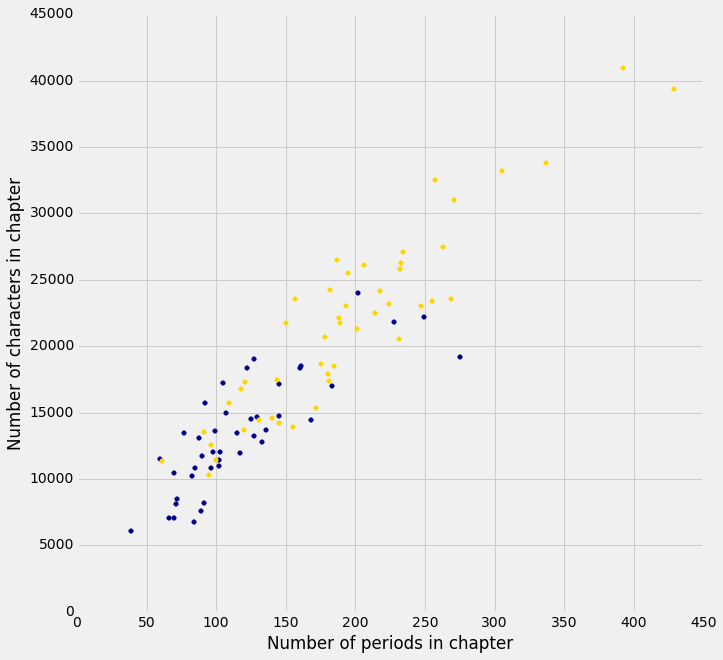

In [13]:
plots.figure(figsize=(10,10))
plots.scatter(chars_periods_hf[1], chars_periods_hf[0], color='darkblue')
plots.scatter(chars_periods_lw[1], chars_periods_lw[0], color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter')

Each chapter of Huckleberry Finn is represented by one blue dot. Each chapter of Little Women is represented by one gold dot. 

[**Discussion.** What the plot tells us.]